In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#importing the dataset
dataset = pd.read_csv('adult.csv')

In [3]:
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [4]:
dataset.shape

(32561, 15)

In [5]:
# Checking for null values, if any
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
#Replacing question marks in dataset with null values

df = dataset.replace('?',np.nan)

In [7]:
#Percentage of Missing Data from each column
# no.of nulls / total no.of rows * 100 rounded to 2 decimals
round(df.isnull().sum()/df.shape[0]*100,2)

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.79
income            0.00
dtype: float64

In [8]:
#Since a very small amount of data is missing, we can replace the null values with the mode of each column

df['occupation'].describe()

count              30718
unique                14
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [9]:
#Since mode is Prof-specialty, replacing null values with it

df['occupation'] = df['occupation'].fillna('Prof-specialty')

In [10]:
# Observing workclass column

df['workclass'].describe()

count       30725
unique          8
top       Private
freq        22696
Name: workclass, dtype: object

In [11]:
#Since mode is `Private`, replacing null values with it

df['workclass'] = df['workclass'].fillna('Private')

In [12]:
df['native.country'].describe()

count             31978
unique               41
top       United-States
freq              29170
Name: native.country, dtype: object

In [13]:
#Since mode is United-States, replacing null values with it

df['native.country'] = df['native.country'].fillna('United-States')

In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

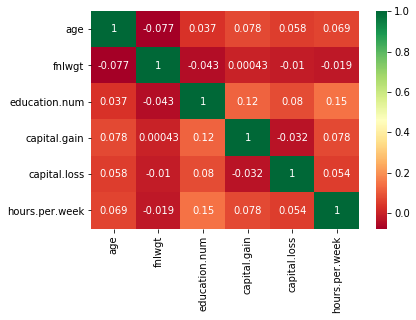

In [15]:
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue')
sns.heatmap(df.corr(), annot=True, cmap=color); 

In [16]:
df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [17]:
df2 = df.drop(['fnlwgt'], axis=1)

In [18]:
# Removing Outliers

In [19]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

cols = ['capital.gain','age','capital.loss','hours.per.week']
df2 = df2[~((df2[cols] < (Q1 - 3 * IQR)) |(df2[cols] > (Q3 + 3 * IQR))).any(axis=1)]
df2

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4233,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4234,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4235,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4237,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [20]:
df2['capital.gain'].describe()

count    24424.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: capital.gain, dtype: float64

In [21]:
df2['capital.loss'].describe()

count    24424.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: capital.loss, dtype: float64

In [22]:
df2['hours.per.week'].describe()

count    24424.000000
mean        41.632042
std          7.065386
min         25.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         60.000000
Name: hours.per.week, dtype: float64

In [23]:
 # Dropping capital.loss, capital.gain as all values are 0 after removing outliers

df2 = df2.drop(['capital.loss', 'capital.gain'], axis=1) 

In [24]:


df2['native.country'].value_counts(normalize=True)*100



United-States                 90.939240
Mexico                         2.292827
Philippines                    0.626433
Germany                        0.421716
Puerto-Rico                    0.376679
El-Salvador                    0.348018
Canada                         0.348018
Cuba                           0.302981
Jamaica                        0.290698
India                          0.274320
England                        0.253849
Dominican-Republic             0.253849
Guatemala                      0.241566
China                          0.225188
Italy                          0.225188
Columbia                       0.212905
South                          0.200622
Vietnam                        0.196528
Japan                          0.180151
Poland                         0.180151
Portugal                       0.143302
Taiwan                         0.139207
Haiti                          0.135113
Iran                           0.131019
Nicaragua                      0.114641



Majority of the values in native.country seem to be USA i.e., 90.9%

In [25]:
df2 = df2.drop(['native.country'], axis=1)

In [26]:
# Checking for correlation between columns 'education' and 'education-num'

pd.crosstab(df2['education.num'],df2['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
education.num,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,38,0,0
2,0,0,0,131,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,273,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,485,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,410,0,0,0,0,0,0,0,0,0
6,683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,751,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,311,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,8400,0,0,0,0




We can clearly see that categorical feature 'education' can perfectly be described numeric feature 'education.num'. Hence, we can drop one column.



In [27]:
df2 = df2.drop(['education'], axis=1)

In [29]:
df2

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
4232,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
4233,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4234,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
4235,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K
4237,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,>50K
...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K


### Correlation Matrix

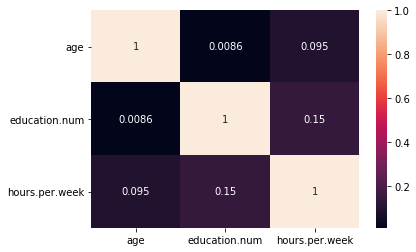

In [30]:
sns.heatmap(df2.corr(), annot=True); 

In [31]:
#Splitting the data set into features and outcome

X = df2.drop(['income'], axis=1)
Y = df2['income']

In [32]:
# map income to 0 for <= 50k and map to 1 if income > 50k
Y = Y.map({'<=50K':0, '>50K':1})

In [33]:
#Splitting the data into test data and training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


In [34]:
X_train

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week
17709,20,Private,9,Never-married,Prof-specialty,Own-child,White,Female,40
25626,29,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,40
32383,55,Local-gov,14,Never-married,Prof-specialty,Not-in-family,White,Female,45
28209,19,Private,7,Never-married,Other-service,Not-in-family,Black,Male,40
7978,25,Private,13,Never-married,Craft-repair,Not-in-family,White,Male,40
...,...,...,...,...,...,...,...,...,...
19423,47,Self-emp-inc,4,Never-married,Craft-repair,Not-in-family,Other,Male,40
27012,59,Self-emp-inc,11,Divorced,Prof-specialty,Not-in-family,White,Male,50
15609,51,Private,11,Divorced,Adm-clerical,Unmarried,White,Female,38
16718,30,Federal-gov,13,Never-married,Protective-serv,Not-in-family,White,Female,60


In [35]:
num_cols = X_train.select_dtypes(np.number).columns
X_train_num = X_train.loc[:,num_cols]
X_train_num

,age,education.num,hours.per.week
17709,20,9,40
25626,29,10,40
32383,55,14,45
28209,19,7,40
7978,25,13,40
...,...,...,...
19423,47,4,40
27012,59,11,50
15609,51,11,38
16718,30,13,60


In [36]:
from sklearn import preprocessing

# Standardizing the features 

normalizer = preprocessing.Normalizer()
X_train_num = normalizer.fit_transform(X_train_num)


In [37]:
X_test_num = X_test.loc[:,num_cols]
X_test_num = normalizer.transform(X_test_num)

In [38]:
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit(X_train_num)


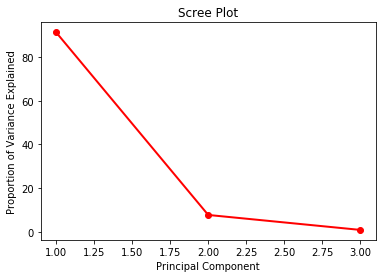

In [39]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_ *100, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()


In [40]:
pca.explained_variance_ratio_

array([0.91336956, 0.07753828, 0.00909215])

In [41]:
pca99 = PCA(.99)
pca99.fit(X_train_num)
pca99.explained_variance_ratio_

array([0.91336956, 0.07753828])

In [42]:
X_train_num_pca = pca99.transform(X_train_num)
X_test_num_pca = pca99.transform(X_test_num) 

In [43]:
X_train_num_pca.shape

(17096, 2)

In [44]:
X_test_num_pca.shape

(7328, 2)

In [45]:
# Encoding categorical features

categorical_columns = X_train.select_dtypes(exclude=np.number).columns
categorical_columns



Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex'],
      dtype='object')

In [46]:
X_train_cat = X_train.loc[:,categorical_columns]

In [47]:
X_train

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week
17709,20,Private,9,Never-married,Prof-specialty,Own-child,White,Female,40
25626,29,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,40
32383,55,Local-gov,14,Never-married,Prof-specialty,Not-in-family,White,Female,45
28209,19,Private,7,Never-married,Other-service,Not-in-family,Black,Male,40
7978,25,Private,13,Never-married,Craft-repair,Not-in-family,White,Male,40
...,...,...,...,...,...,...,...,...,...
19423,47,Self-emp-inc,4,Never-married,Craft-repair,Not-in-family,Other,Male,40
27012,59,Self-emp-inc,11,Divorced,Prof-specialty,Not-in-family,White,Male,50
15609,51,Private,11,Divorced,Adm-clerical,Unmarried,White,Female,38
16718,30,Federal-gov,13,Never-married,Protective-serv,Not-in-family,White,Female,60


In [48]:
X_test_cat = X_test.loc[:,categorical_columns]
X_test_cat

,workclass,marital.status,occupation,relationship,race,sex
27824,Private,Never-married,Prof-specialty,Not-in-family,White,Male
21723,Self-emp-not-inc,Married-civ-spouse,Craft-repair,Husband,White,Male
21708,Private,Separated,Sales,Not-in-family,White,Female
18574,Private,Never-married,Prof-specialty,Not-in-family,White,Male
25397,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Wife,White,Female
...,...,...,...,...,...,...
13340,Local-gov,Never-married,Adm-clerical,Own-child,White,Female
18125,Local-gov,Married-civ-spouse,Prof-specialty,Husband,White,Male
20748,Private,Widowed,Adm-clerical,Not-in-family,White,Female
24853,Private,Divorced,Sales,Unmarried,White,Male


In [49]:
X_train_final_data = pd.get_dummies(data=X_train_cat, prefix=categorical_columns, drop_first=True)
X_train_final_data

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
17709,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
25626,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
32383,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
28209,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
7978,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19423,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
27012,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
15609,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
16718,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [50]:
X_test_final_data = pd.get_dummies(data=X_test_cat, prefix=categorical_columns, drop_first=True)
X_test_final_data

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
27824,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
21723,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
21708,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
18574,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
25397,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13340,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
18125,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
20748,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
24853,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [51]:
X_train_final_data['pc1'] = X_train_num_pca[:, 0]
X_train_final_data['pc2'] = X_train_num_pca[:, 1]

In [52]:
X_train_final_data

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,pc1,pc2
17709,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,-0.250502,-0.006057
25626,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,-0.093883,0.009510
32383,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.156936,0.034697
28209,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,-0.266678,-0.049252
7978,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,-0.165481,0.071635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19423,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0.155684,-0.096398
27012,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0.147710,-0.020272
15609,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.203918,0.017912
16718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,-0.250032,-0.013205


In [53]:
X_test_final_data['pc1'] = X_test_num_pca[:,0]
X_test_final_data['pc2'] = X_test_num_pca[:,1]
X_test_final_data

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,pc1,pc2
27824,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,-0.079834,0.027874
21723,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0.393859,0.004709
21708,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,-0.137568,0.019130
18574,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0.138936,0.041780
25397,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0.101181,-0.015603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13340,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,-0.060381,-0.010745
18125,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0.136404,0.045054
20748,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.324517,0.109488
24853,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0.097548,-0.017318


In [63]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_final_data, Y_train)


acc_log = round(logreg.score(X_test_final_data, Y_test) * 100, 2)

In [64]:
acc_log

83.42

In [67]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_final_data, Y_train) 
acc_decision_tree = round(decision_tree.score(X_test_final_data, Y_test) * 100, 2)
print(acc_decision_tree)

78.85


In [68]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_final_data, Y_train)
 

random_forest.score(X_test_final_data, Y_test) 


0.820278384279476

In [81]:
from sklearn.svm import  LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train_final_data, Y_train)
 

acc_linear_svc = round(linear_svc.score(X_test_final_data, Y_test) * 100, 2)
print(acc_linear_svc)

83.41
